<a href="https://colab.research.google.com/github/bi-horn/CNN_Medical_Image_Classification/blob/main/CNN_XRay_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - ResNet-34

##### Using a pre-trained model as a basis instead of starting from scratch offers significant advantages. Training a model from scratch requires a large labelled dataset and significant computational resources. However, by fine-tuning the pre-trained model on a targeted imaging dataset, one can optimise its performance for a specific task. Fine-tuning involves adjusting the weights of the pre-trained model based on the X-ray dataset, enabling faster convergence and potentially improving overall performance.

##### Pre-trained models like ResNet-34 are readily available in popular deep learning libraries

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
data_path = '/content/drive/My Drive/XRay/'

sample_ratio = 0.4 #Test size: Similar to training without pre-training, setting aside around 20-30% of the data for testing would be appropriate
batch_size = 64 #The choice of batch size when using pre-trained models is often similar to training without pre-training
num_epochs = 20 #Since pre-trained models provide a good starting point, you may need fewer epochs compared to training from scratch

In [8]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [9]:
#load training, test and validation datasets and preprocess the images
%run '/content/drive/My Drive/Colab Notebooks/utils.ipynb'
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio)

In [10]:
# Define the ResNet34 model and set Pretraining to False to train model from scratch
# ResNet50 or higher is even deeper and might aim better results but it is a balance between model complexity and computational cost

model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet34', pretrained = True)
model.fc = nn.Linear(512, len(dataset.classes)) #replaces the fully connected layer (model.fc) with a new one that has the output size matching the number of classes in the dataset
#print(len(dataset.classes)) #= 2 NORMAL or PNEUMONIA
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
#criterion and optimizer are inputs of the train function
model_name = "ResNet34_pretrained_20epochs"
losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, model_name, num_epochs)

#Save pre-trained model to file
torch.save(model.state_dict(), "{}{}.pth".format(data_path, model_name))


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
Epoch 1/20: 100%|██████████| 26/26 [15:15<00:00, 35.21s/batch,        Accuracy=0.932, Loss=0.176, Precision=0.92, Recall=0.913, F1 Score=0.916]


VALIDATION: Accuracy: 0.9574 | Loss: 0.1484 | Recall: 0.9138 | Precision: 0.9733 | F-score: 0.9391



Epoch 2/20: 100%|██████████| 26/26 [13:02<00:00, 30.08s/batch,        Accuracy=0.885, Loss=0.294, Precision=0.894, Recall=0.881, F1 Score=0.887]


VALIDATION: Accuracy: 0.9489 | Loss: 0.1425 | Recall: 0.9545 | Precision: 0.9183 | F-score: 0.9343



Epoch 3/20: 100%|██████████| 26/26 [13:07<00:00, 30.27s/batch,        Accuracy=0.964, Loss=0.0578, Precision=0.915, Recall=0.906, F1 Score=0.91]


VALIDATION: Accuracy: 0.9617 | Loss: 0.1339 | Recall: 0.9688 | Precision: 0.9355 | F-score: 0.9504



Epoch 4/20: 100%|██████████| 26/26 [13:06<00:00, 30.25s/batch,        Accuracy=0.969, Loss=0.0665, Precision=0.927, Recall=0.92, F1 Score=0.923]


VALIDATION: Accuracy: 0.9745 | Loss: 0.1075 | Recall: 0.9715 | Precision: 0.9610 | F-score: 0.9661



Epoch 5/20: 100%|██████████| 26/26 [13:02<00:00, 30.10s/batch,        Accuracy=0.96, Loss=0.346, Precision=0.932, Recall=0.926, F1 Score=0.929]


VALIDATION: Accuracy: 0.9574 | Loss: 0.1218 | Recall: 0.9660 | Precision: 0.9289 | F-score: 0.9452



Epoch 6/20: 100%|██████████| 26/26 [13:01<00:00, 30.05s/batch,        Accuracy=0.982, Loss=0.119, Precision=0.94, Recall=0.935, F1 Score=0.937]


VALIDATION: Accuracy: 0.9872 | Loss: 0.0851 | Recall: 0.9857 | Precision: 0.9802 | F-score: 0.9829



Epoch 7/20: 100%|██████████| 26/26 [12:57<00:00, 29.92s/batch,        Accuracy=0.98, Loss=0.495, Precision=0.945, Recall=0.941, F1 Score=0.943]


VALIDATION: Accuracy: 0.9787 | Loss: 0.0877 | Recall: 0.9743 | Precision: 0.9689 | F-score: 0.9716



Epoch 8/20: 100%|██████████| 26/26 [13:03<00:00, 30.15s/batch,        Accuracy=0.984, Loss=0.0407, Precision=0.949, Recall=0.946, F1 Score=0.948]


VALIDATION: Accuracy: 0.9745 | Loss: 0.0882 | Recall: 0.9657 | Precision: 0.9657 | F-score: 0.9657



Epoch 9/20: 100%|██████████| 26/26 [12:59<00:00, 29.98s/batch,        Accuracy=0.994, Loss=0.0229, Precision=0.954, Recall=0.951, F1 Score=0.953]


VALIDATION: Accuracy: 0.9702 | Loss: 0.1143 | Recall: 0.9686 | Precision: 0.9533 | F-score: 0.9606



Epoch 10/20: 100%|██████████| 26/26 [13:00<00:00, 30.00s/batch,        Accuracy=0.989, Loss=0.00439, Precision=0.957, Recall=0.955, F1 Score=0.956]


VALIDATION: Accuracy: 0.9830 | Loss: 0.0979 | Recall: 0.9829 | Precision: 0.9721 | F-score: 0.9774



Epoch 11/20: 100%|██████████| 26/26 [13:00<00:00, 30.03s/batch,        Accuracy=0.985, Loss=0.042, Precision=0.96, Recall=0.957, F1 Score=0.959]


VALIDATION: Accuracy: 0.9660 | Loss: 0.1395 | Recall: 0.9716 | Precision: 0.9424 | F-score: 0.9557



Epoch 12/20: 100%|██████████| 26/26 [13:09<00:00, 30.35s/batch,        Accuracy=0.987, Loss=0.186, Precision=0.962, Recall=0.96, F1 Score=0.961]


VALIDATION: Accuracy: 0.9702 | Loss: 0.1095 | Recall: 0.9455 | Precision: 0.9741 | F-score: 0.9587



Epoch 13/20: 100%|██████████| 26/26 [13:09<00:00, 30.35s/batch,        Accuracy=0.997, Loss=0.0341, Precision=0.964, Recall=0.963, F1 Score=0.963]


VALIDATION: Accuracy: 0.9830 | Loss: 0.0942 | Recall: 0.9771 | Precision: 0.9771 | F-score: 0.9771



Epoch 14/20: 100%|██████████| 26/26 [13:10<00:00, 30.39s/batch,        Accuracy=0.998, Loss=0.000355, Precision=0.967, Recall=0.965, F1 Score=0.966]


VALIDATION: Accuracy: 0.9787 | Loss: 0.1244 | Recall: 0.9743 | Precision: 0.9689 | F-score: 0.9716



Epoch 15/20: 100%|██████████| 26/26 [13:38<00:00, 31.47s/batch,        Accuracy=1, Loss=0.0315, Precision=0.969, Recall=0.967, F1 Score=0.968]


VALIDATION: Accuracy: 0.9787 | Loss: 0.1427 | Recall: 0.9801 | Precision: 0.9643 | F-score: 0.9719



Epoch 16/20: 100%|██████████| 26/26 [13:48<00:00, 31.88s/batch,        Accuracy=1, Loss=2.44e-6, Precision=0.971, Recall=0.969, F1 Score=0.97]


VALIDATION: Accuracy: 0.9830 | Loss: 0.1875 | Recall: 0.9829 | Precision: 0.9721 | F-score: 0.9774



Epoch 17/20: 100%|██████████| 26/26 [13:51<00:00, 31.97s/batch,        Accuracy=1, Loss=0.000254, Precision=0.973, Recall=0.971, F1 Score=0.972]


VALIDATION: Accuracy: 0.9787 | Loss: 0.1807 | Recall: 0.9743 | Precision: 0.9689 | F-score: 0.9716



Epoch 18/20: 100%|██████████| 26/26 [13:59<00:00, 32.30s/batch,        Accuracy=1, Loss=0.000152, Precision=0.974, Recall=0.973, F1 Score=0.973]


VALIDATION: Accuracy: 0.9787 | Loss: 0.2052 | Recall: 0.9743 | Precision: 0.9689 | F-score: 0.9716



Epoch 19/20: 100%|██████████| 26/26 [13:56<00:00, 32.19s/batch,        Accuracy=0.996, Loss=0.00459, Precision=0.975, Recall=0.974, F1 Score=0.975]


VALIDATION: Accuracy: 0.9702 | Loss: 0.1443 | Recall: 0.9686 | Precision: 0.9533 | F-score: 0.9606



Epoch 20/20: 100%|██████████| 26/26 [13:56<00:00, 32.18s/batch,        Accuracy=0.993, Loss=0.0206, Precision=0.976, Recall=0.975, F1 Score=0.975]


VALIDATION: Accuracy: 0.9617 | Loss: 0.1219 | Recall: 0.9688 | Precision: 0.9355 | F-score: 0.9504

Training took: 282.3261877735456 minutes


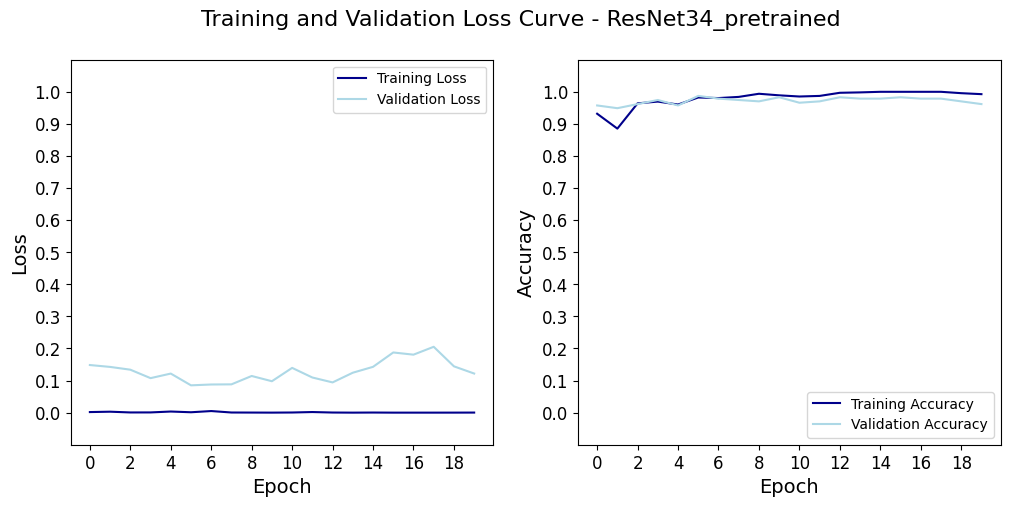

In [81]:
model_name = "ResNet34_pretrained"
plot_model_curves(losses, accuracies, v_accuracies, v_losses, data_path, model_name)

TEST: Accuracy: 0.9722 | Loss: 0.0773 | Recall: 0.9807 | Precision: 0.9552 | F-score: 0.9667



<Figure size 800x800 with 0 Axes>

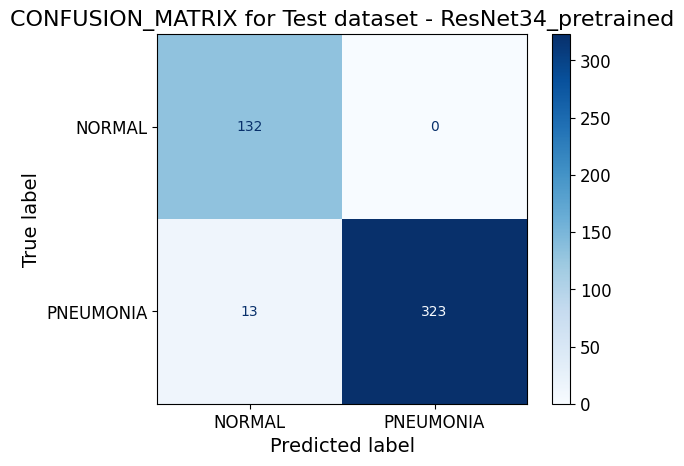

In [82]:
test_accuracy, test_loss, test_true, test_pred = evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, model_name)

plot_confusion_mat(test_true, test_pred, model_name, test_loader, "Test", data_path)